# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Auction Verification menggunakan Naïve Bayes

<b>Kelompok: </b>

Anggota:
1. Bintang Rizky Zulfikar - 1301223104
2. Muhammad Naufal Arifin - 1301220356
3. Sakie Giano Suza - 1301223205

#### Pendahuluan
Auction Verification adalah dataset yang digunakan untuk studi ilmiah, tujuan dataset ini sendiri adalah mengurangi biaya dalam verifikasi hasil simultaneous multi-round auctions (SMRA). Setiap instance dari dataset mewakili satu proses verifikasi. Verifikasi ialah apakah harga tertentu mungkin untuk produk tertentu dan apakah penawar tertentu memenangkan produk dengan harga tersebut.
Penjelasan dari variabel yang ada pada Dataset:
1. process.b1.capacity = Kapasitas (jumlah maksimal produk yang menang) dari bider 1. (variabel ini tidak akan dipakai dalam model).
2. process.b2.capacity = Kapasitas (jumlah maksimal produk yang menang) dari bider 2. (variabel ini tidak akan dipakai dalam model).
3. process.b3.capacity = Kapasitas (jumlah maksimal produk yang menang) dari bider 3. (variabel ini tidak akan dipakai dalam model).
4. process.b4.capacity = Kapasitas (jumlah maksimal produk yang menang) dari bider 4. (variabel ini tidak akan dipakai dalam model).
5. property.price = Harga saat ini diverifikasi.
6. property.product = Produk saat ini diverifikasi.
7. property.winner = Penawar saat ini diverifikasi sebagai pemenang produk (0 jika hanya harga yang diverifikasi).
8. verification.result	= Hasil verifikasi biner (apakah hasil yang diverifikasi mungkin?).
9. verification.time = Runtime prosedur verifikasi. (variabel ini tidak akan dipakai dalam model).

Target variabel yang akan digunakan adalah verification.result, penggunaan variabel ini dikarenakan tujuan dari setiap instance adalah memeriksa apakah hasil yang diverifikasi oleh variabel property.price, property.product dan property.winner mungkin. Variabel verification.result adalah False atau True (biner), oleh sebab itu lebih tepat apabila mengambil studi kasus klasifikasi.

Alasan variabel verification.time, process.b1.capacity, process.b2.capacity, process.b3.capacity, process.b4.capacity tidak digunakan bahkan dihapus dalam model adalah karena atribut tersebut tidak terlalu penting dalam pengambilan kesimpulan dari setiap instance dan untuk runtime sangat bergantung dengan device yang digunakan sehingga runtime akan sangat bervariasi sesuai dengan spesifikasi komputer.

Pengolahan dataset kami menggunakan library pandas. Dataset yang awalnya memiliki variabel verification.time, process.b1.capacity, process.b2.capacity, process.b3.capacity, process.b4.capacity akan dihapus karena alasan sebelumnya. Dataset tidak memiliki missing value, duplicate data. Korelasi dari masing-masing variabel dapat dilihat dari heatmap ini:

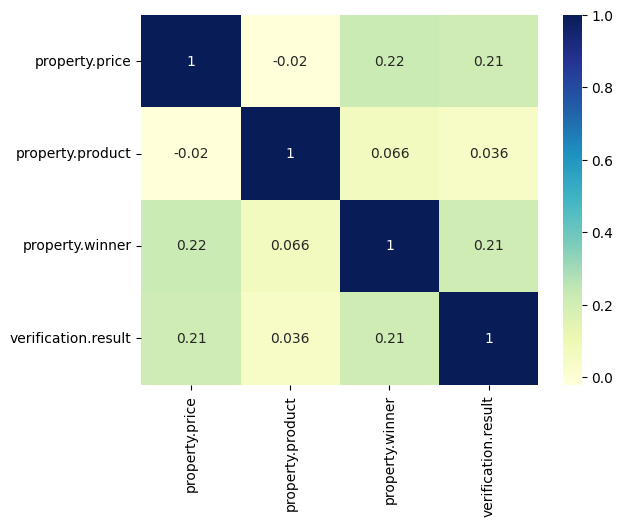

Sebagian besar variabel memiliki korelasi rendah atau hampir tidak ada korelasi satu sama lain, menunjukkan bahwa mereka mungkin beroperasi secara relatif independen dalam konteks dataset ini.

Dataset dilakukan splitting dengan pengambilan secara random data latih sebanyak 80% dari data yang ada, sedangkan untuk data uji adalah data sisa dari hasil pengambilan data oleh data latih.

In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here

#Data Preprocessing
import pandas as pd

df = pd.read_csv('/data.csv') # Import data form .csv with pandas

del df['verification.time'] # Delete verification.time column
del df['process.b1.capacity'] # Delete process.b1.capacity column
del df['process.b2.capacity'] # Delete process.b2.capacity column
del df['process.b3.capacity'] # Delete process.b3.capacity column
del df['process.b4.capacity'] # Delete process.b4.capacity column

# Data splitting
train=df.sample(frac=0.8,random_state=89)   # Make train data from 80% real data with randomize

test=df.drop(train.index) # Make test data from remaining data

# Show data
df

,property.price,property.product,property.winner,verification.result
0,59,1,0,False
1,59,2,0,False
2,59,4,0,False
3,59,6,0,False
4,60,1,0,True
...,...,...,...,...
2038,90,5,0,True
2039,90,5,1,True
2040,90,5,2,False
2041,90,5,3,False


#### Metode yang Digunakan

Metode yang akan digunakan adalah Naïve Bayes dikarenakan variabel target yang digunakan adalah sebuah binary classification (False/True). Kenapa metode ini lebih cocok dari pada metode lain? Naïve Bayes merupakan metode pembuatan model classification yang dalam pembuatan model nya tidak mempedulikan correlation dari satu atribut dengan atribut lainnya atau bisa dibilang menganggap semua atribut adalah atribut yang independen, ini sesuai dengan kesimpulan dari pembacaan heatmap yang telah dipaparkan dimana setiap variabel memiliki correlation yang lemah dengan variabel lainnya, membuktikan bahwa setiap variabel dari data yang dipakai adalah independen. Jenis Naïve Bayes yang  dipakai adalah for Naïve Bayes for Continuous-valued Features karena atribut dari dataset adalah integer bukan label.

Parameter yang akan dipakai terdapat Mean (rata-rata), Standard Deviation, Gaussian Formula (digunakan saat testing), hasil model baik itu False atau True, data latih, dan data uji. Mean dan standard deviation itu digunakan dalam pembuatan model dari naive bayes. Gaussian Formula adalah rumus yang dipakai sebagai bahan pengambil keputusan berdasarkan model yang telah dimiliki.

In [ ]:
# Experiment Settings
# Write your code here

# Function for calculate mean for data
def calculateMean(data):
  i = 0
  jumlah = 0
  banyakData = len(data)
  while i < banyakData:
    jumlah += data[i]
    i += 1

  mean = jumlah / banyakData

  return mean

# Function for calculate standar deviation for data
def calculateStandarDeviation(data, mean):
  i = 0
  jumlah = 0
  banyakData = len(data)
  while i < banyakData :
    jumlah += (data[i]-mean)**2
    i += 1

  standarDeviation = (jumlah / (banyakData-1))**0.5

  return standarDeviation

# Function for calculate gaussian model
def calculateGaussian(testData, modelMean, modelStandarDeviation):
  import math
  eksponen = math.exp(-((testData - modelMean) ** 2) / (2 * modelStandarDeviation ** 2))
  hasil = (1 / (math.sqrt(2 * math.pi) * modelStandarDeviation))*eksponen
  return hasil

# Function for get a model of Naiv Bayes
def naivBayes(data, classification):
  filtered_data = data[data["verification.result"] == classification]
  selected_columns = ["property.price", "property.product",
                        "property.winner", "verification.result"]

  dataByClass = filtered_data[selected_columns].values

  mean =  calculateMean(dataByClass)
  mean[3] = len(filtered_data) / len(data)
  standarDeviasi = calculateStandarDeviation(dataByClass, mean)
  model = [mean,standarDeviasi]

  return model

# Function for testing test data to the model of naiv bayes
def testing(testData, modelTrue, modelFalse):
  banyakData = len(testData)
  i=0
  j=0
  jumlahTrue = 1
  jumlahFalse = 1
  recmmFalse = modelFalse[0][3]
  recmmTrue = modelTrue[1][3]
  selected_columns = ["property.price", "property.product",
                        "property.winner", "verification.result"]
  testDataArray = testData[selected_columns].values
  while i < banyakData:
    while j < 3:
      jumlahTrue *= calculateGaussian(testDataArray[i][j], modelTrue[0][j], modelTrue[1][j])
      jumlahFalse *= calculateGaussian(testDataArray[i][j], modelFalse[0][j], modelFalse[1][j])
      j += 1
    jumlahTrue *= recmmTrue
    jumlahFalse *= recmmFalse
    if jumlahTrue > jumlahFalse:
      testDataArray[i][3] = True
    else:
      testDataArray[i][3] = False
    i += 1

  return testDataArray

# Function for evaluation testing data real result with testing data model result
def evaluation(realData, testData):
  i = 0
  j = 0
  banyakData = len(realData)
  selected_columns = ["property.price", "property.product",
                        "property.winner", "verification.result"]
  comparisonData = realData[selected_columns].values
  while i < banyakData:
    if comparisonData[i][3] == testData[i][3]:
      j += 1
    i +=1

  return j/banyakData

In [ ]:
# Model Training
# Save the trained model
# Write your code here

modelTrue = naivBayes(train, True)
modelFalse = naivBayes(train, False)

[array([70.81618168914123, 3.211497515968772, 0.36621717530163234,
       0.8623011015911872], dtype=object), array([7.760869899910013, 1.8123968897476166, 1.0193552780630695,
       0.8626072621197834], dtype=object)]


In [ ]:
# Model Testing and Evaluation
# Show the performance
# Write your code here

hasilTesting = testing(test, modelTrue, modelFalse)
hasilEvaluation = evaluation(test, hasilTesting)
print(format(hasilEvaluation*100, '.2f'), "%")

90.95 %


#### Hasil dan Analisis

Model yang didapat setelah menjalankan proses learning data:
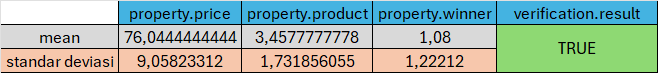

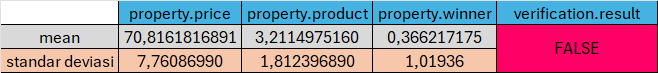

Graph yang menyatakan kecocokan dengan data asli:

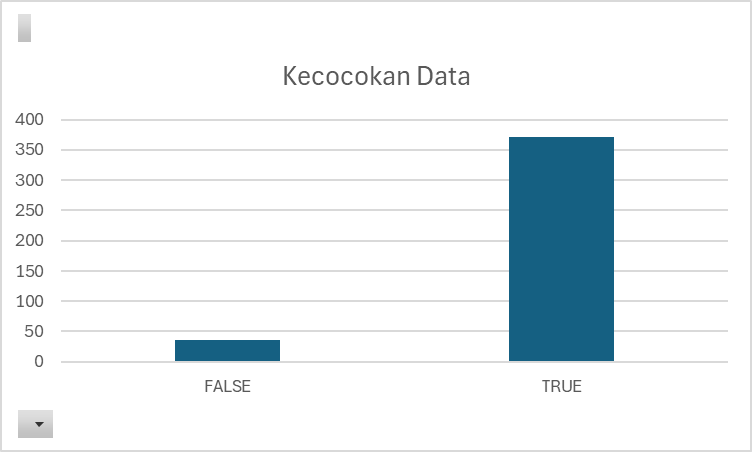

Dilihat dari graph diatas dapat dilihat true adalah data yang cocok antara data test real dengan data hasil testing, dan false adalah data yang tidak cocok antara data test real dengan data hasil evaluation. Setelah model Naïve Bayes untuk klasifikasi biner dijalankan pada dataset yang telah diproses, didapatkan hasil kecocokan data hasil testing dengan data yang asli sebanyak 90.95%. Artinya, model mampu memprediksi hasil verifikasi dengan benar sebanyak 90.95% dari total data uji yang digunakan.

Akurasi sebesar 90.95% menunjukkan bahwa model Naïve Bayes yang digunakan memiliki performa yang sangat baik dalam memprediksi hasil verifikasi (True/False) berdasarkan variabel input yang ada. Ini berarti model dapat mengidentifikasi hasil yang benar di sebagian besar kasus.


#### Kesimpulan
Model Naïve Bayes yang digunakan menunjukkan performa yang sangat baik dengan akurasi 90.95% dalam memprediksi hasil verifikasi simultaneous multi-round auctions (SMRA). Pemilihan fitur dan metode yang tepat berdasarkan analisis korelasi serta asumsi independensi variabel telah terbukti efektif. Penghapusan variabel yang tidak signifikan dan memastikan dataset dalam kondisi bersih berkontribusi pada keberhasilan model ini.